In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [163]:
data=pd.read_csv("weather_data.csv")

In [164]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


# Preprocessing Data

In [165]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000
mean,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828
std,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638
min,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000
50%,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000
75%,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000
max,34.005556,36.400000,1.000000,45.933300,359.000000,16.100000,0.0,1045.140000


In [166]:
data.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [167]:
data['Loud Cover'].value_counts()

0    5999
Name: Loud Cover, dtype: int64

In [168]:
data['Summary'].value_counts()

Partly Cloudy               1791
Mostly Cloudy               1473
Overcast                    1230
Clear                        853
Foggy                        576
Breezy and Overcast           25
Breezy and Mostly Cloudy      20
Breezy and Partly Cloudy       7
Breezy and Foggy               7
Humid and Mostly Cloudy        6
Windy and Overcast             4
Humid and Partly Cloudy        3
Windy and Partly Cloudy        2
Windy and Foggy                2
Name: Summary, dtype: int64

In [169]:
data['Precip Type'].value_counts()

rain    4762
snow    1237
Name: Precip Type, dtype: int64

In [170]:
data['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                                                                   600
Partly cloudy until night.                                                                                          456
Mostly cloudy until night.                                                                                          455
Partly cloudy throughout the day.                                                                                   384
Foggy starting overnight continuing until morning.                                                                  360
Overcast throughout the day.                                                                                        360
Partly cloudy starting in the morning.                                                                              336
Foggy in the morning.                                                                                               288
Partly cloudy starting in the afternoon.

# Identifying Outliers

In [171]:
import seaborn as sns

In [172]:
data.columns


Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

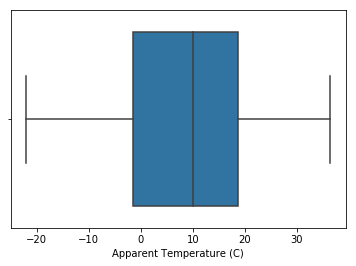

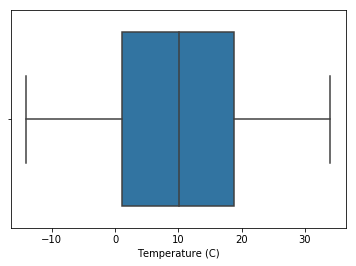

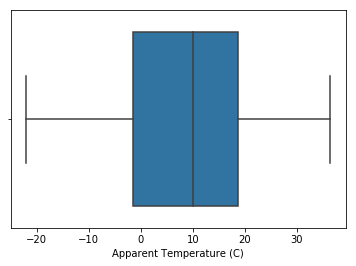

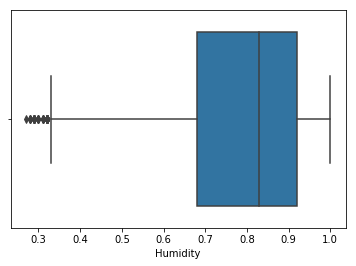

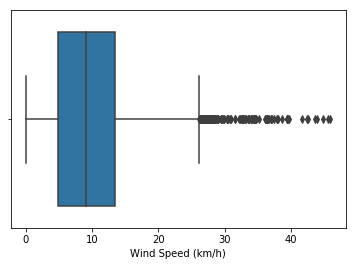

In [173]:
plt.figure(0)
sns.boxplot(x=data['Apparent Temperature (C)'])
plt.figure(1)
sns.boxplot(x=data['Temperature (C)'])
plt.figure(2)
sns.boxplot(x=data['Apparent Temperature (C)'])
plt.figure(3)
sns.boxplot(x=data['Humidity'])
plt.figure(4)
sns.boxplot(x=data['Wind Speed (km/h)'])

#As we can see there are outliers which can be neglected

# Visualization

<Figure size 432x288 with 0 Axes>

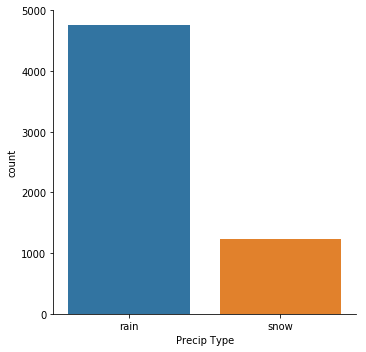

In [175]:
plt.figure(0)
sns.catplot('Precip Type',data=data,kind='count')

# FEATURE ENGINEERING

In [176]:
#COLUMNS TO BE DROPPED
#a>. we will drop Loud Cover because it has only single value 0.
#b>. we will drop Daily Summary because it has data same as summary column.
#c>. we will drop Formatted Date because it has nothing to do with temperature prediction.

columns=['Loud Cover','Daily Summary','Formatted Date']
data=data.drop(columns=columns)


In [177]:
data.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [178]:
from sklearn.preprocessing import LabelEncoder
column_name=['Summary','Precip Type']
number=LabelEncoder()

In [179]:
for i in column_name:
      data[i]=number.fit_transform(data[i])

In [180]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,10,0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,10,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,8,0,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,10,0,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,8,0,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [181]:
x=data.iloc[:,[0,1,2,4,5,6,7,8]].values
y=data.iloc[:,[3]].values

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [183]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [184]:
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()

In [185]:
classifier.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [186]:
y_pred=classifier.predict(x_test)

In [187]:
y_pred[:20]

array([[21.35063   ],
       [ 0.6472991 ],
       [ 5.1287713 ],
       [21.90114819],
       [15.81016781],
       [25.62586772],
       [ 2.74393072],
       [ 0.41637254],
       [23.01380704],
       [10.59972354],
       [16.74063973],
       [19.59512532],
       [18.36703903],
       [10.32573662],
       [ 9.5622302 ],
       [15.56822488],
       [17.36690101],
       [ 7.84535822],
       [22.15350327],
       [15.21518566]])

In [188]:
y_test[:20]

array([[21.46111111],
       [-0.36111111],
       [ 5.06666667],
       [21.25555556],
       [15.40555556],
       [25.95      ],
       [ 3.93888889],
       [ 1.71666667],
       [22.86111111],
       [12.2       ],
       [17.29444444],
       [18.88333333],
       [17.75      ],
       [11.32222222],
       [10.93333333],
       [16.64444444],
       [17.07222222],
       [ 8.06666667],
       [21.11666667],
       [14.8       ]])

In [189]:
accuracy=classifier.score(x_test,y_test)
print('Accuracy Of The Model Is',accuracy*100,'%')

Accuracy Of The Model Is 99.1364785926599 %
